In [1]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 578.0 MB 19 kB/s 
     |████████████████████████████████| 438 kB 70.4 MB/s 
     |████████████████████████████████| 5.9 MB 48.1 MB/s 
     |████████████████████████████████| 1.7 MB 54.2 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5

In [3]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
df = pd.read_csv('Churn_Modelling.csv')

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
X = df.iloc[:,3:13]
y = df.iloc[:,13]

In [8]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [9]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [10]:
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [12]:
X = X.drop(['Geography','Gender'],axis=1)

In [16]:
X = pd.concat([X,geography,gender],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [17]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [23]:
#FeatureScaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
X_train.shape

(8000, 11)

In [26]:
X_train

array([[ 1.27754581, -1.23264342, -0.012743  , ..., -0.58408625,
        -0.57138416, -1.0862028 ],
       [-0.49959477,  0.28410615,  0.33282985, ...,  1.71207591,
        -0.57138416, -1.0862028 ],
       [ 0.67827747, -0.09508124, -1.39503438, ..., -0.58408625,
        -0.57138416, -1.0862028 ],
       ...,
       [ 2.06279398, -0.28467494, -0.70388869, ..., -0.58408625,
        -0.57138416,  0.9206384 ],
       [-1.02653762,  1.42166833, -0.012743  , ...,  1.71207591,
        -0.57138416,  0.9206384 ],
       [ 0.03768029, -1.04304972,  0.67840269, ..., -0.58408625,
        -0.57138416, -1.0862028 ]])

In [27]:
X_test

array([[ 8.33260665e-01, -9.50812388e-02,  1.71512123e+00, ...,
        -5.84086250e-01, -5.71384156e-01, -1.08620280e+00],
       [-5.53096261e-02,  1.89309306e-01, -1.04946154e+00, ...,
         1.71207591e+00, -5.71384156e-01, -1.08620280e+00],
       [-3.34279369e-01,  1.61126203e+00,  6.78402693e-01, ...,
        -5.84086250e-01, -5.71384156e-01,  9.20638397e-01],
       ...,
       [ 8.74589516e-01, -9.50812388e-02, -1.39503438e+00, ...,
        -5.84086250e-01, -5.71384156e-01, -1.08620280e+00],
       [ 3.88975520e-01, -2.84390545e-04, -1.74060723e+00, ...,
        -5.84086250e-01, -5.71384156e-01, -1.08620280e+00],
       [ 7.29938538e-01,  6.63293547e-01, -1.39503438e+00, ...,
        -5.84086250e-01, -5.71384156e-01,  9.20638397e-01]])

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout


In [32]:
##Lets initialize ANN
classifier = Sequential()

In [33]:
#Add 1st Imput layer
classifier.add(Dense(units=11,activation='relu'))

In [34]:
##Adding first hidden Layer
classifier.add(Dense(units=7, activation='relu'))

In [35]:
##Adding second hidden layer
classifier.add(Dense(units=6, activation='relu')) 

In [36]:
##Adding output Layer
classifier.add(Dense(1,activation='sigmoid'))

In [50]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [51]:
##Train our nn
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [52]:
##early_stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [53]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 2s 2ms/step - loss: 0.3606 - accuracy: 0.8466 - val_loss: 0.3472 - val_accuracy: 0.8580
Epoch 2/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3514 - accuracy: 0.8556 - val_loss: 0.3539 - val_accuracy: 0.8538
Epoch 3/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3517 - accuracy: 0.8530 - val_loss: 0.3389 - val_accuracy: 0.8626
Epoch 4/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3489 - accuracy: 0.8535 - val_loss: 0.3565 - val_accuracy: 0.8512
Epoch 5/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3458 - accuracy: 0.8556 - val_loss: 0.3423 - val_accuracy: 0.8660
Epoch 6/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3451 - accuracy: 0.8582 - val_loss: 0.3453 - val_accuracy: 0.8569
Epoch 7/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3420 - accuracy: 0.8550 - val_loss: 0.3402 - val_accuracy:

In [54]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

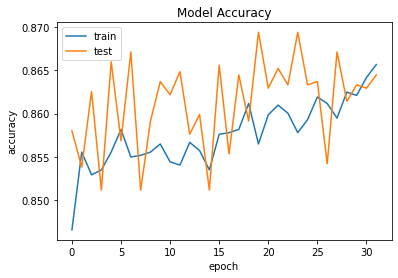

In [55]:
##Plotting accuracy and loss

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

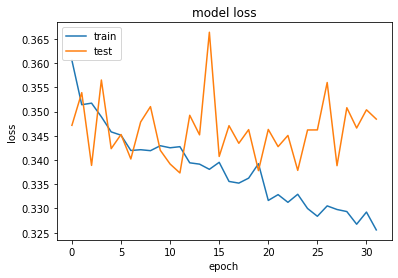

In [56]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [59]:
##Making the predictions and evaluating the model
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 1ms/step


In [60]:
##Making Confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1525,   92],
       [ 200,  183]])

In [61]:
##Calculate Accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.854

In [62]:
classifier.get_weights()

[array([[-0.30841926,  0.36278376, -0.24182276,  0.5361251 , -0.69144624,
         -0.73423725, -0.08943211,  0.10463419, -0.43854925, -0.18059997,
         -0.3190182 ],
        [ 1.4841368 ,  3.3967986 ,  2.7426822 , -0.5375342 , -0.17542101,
          0.8884211 ,  1.4254134 ,  0.63931155, -2.3479934 , -0.5407252 ,
          2.4408355 ],
        [-0.12150388, -0.2496415 , -0.29815778,  1.9346828 ,  0.4581675 ,
          0.68878186, -0.03177114, -0.36431307, -0.7213062 ,  0.544805  ,
          0.22696263],
        [ 2.4171524 , -0.61449176,  0.72286534, -2.6148863 ,  0.61622596,
          1.1304266 , -0.8509965 ,  2.0267649 ,  1.098288  ,  2.9050193 ,
          0.6891023 ],
        [ 1.5829093 ,  0.11692446, -0.6032938 ,  1.1261866 ,  3.3633378 ,
         -1.2545425 , -3.3907835 ,  2.9890585 , -0.8065654 ,  0.20094977,
         -0.4086589 ],
        [ 0.05024475, -0.35735577,  0.12697971,  0.08478554, -0.7765306 ,
         -0.8353701 , -0.03268969,  0.22336575, -0.3133586 ,  0.0316938

In [ ]:
###Dropout....look into it 